In [71]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
from matplotlib.collections import LineCollection

rng = np.random.default_rng(seed=1)

def sigma(K, x):
  scores = jnp.exp(K @ x.T)
  return scores / jnp.sum(scores)

In [109]:
k_1 = jnp.array([1, 0])
k_2 = jnp.array([0, 1])

K = jnp.stack([k_1, k_2]) * 5.

t = jnp.linspace(0, 1, num = 100)

x_s = (k_1[None, :] * (1 - t[:, None])) + (k_2[None, :] * t[:, None])

scores = jax.vmap(sigma, in_axes=(None, 0))(K, x_s)

lines = LineCollection([[[t[0], scores[0, 0]], [t[-1], scores[-1, 0]]]], color="red")

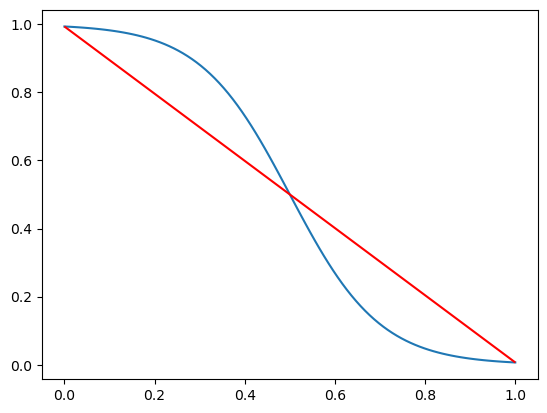

In [110]:
fig, ax = plt.subplots()

ax.plot(t, scores[:, 0])
ax.add_collection(lines)

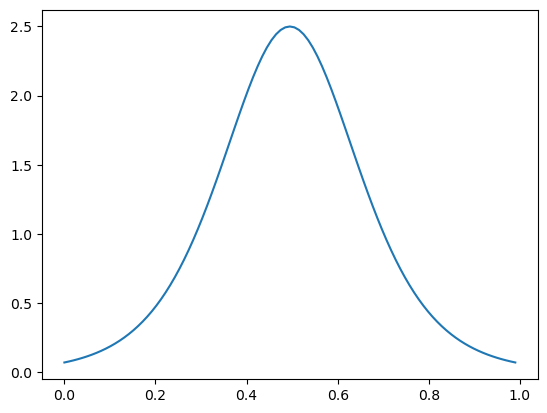

In [111]:
plt.plot(t[:-1], np.abs(np.diff(scores[:, 0])) / np.diff(t))

Looks like the maximum slope is achieved halfway in between, and is half the norm of the elements of $K$

In [140]:
def get_interp(K):
  t = jnp.linspace(0, 1, num = 100)
  k_1, k_2 = K
  x_s = (k_1[None, :] * (1 - t[:, None])) + (k_2[None, :] * t[:, None])

  scores = jax.vmap(sigma, in_axes=(None, 0))(K, x_s)

  lines = LineCollection([[[t[0], scores[0, 0]], [t[-1], scores[-1, 0]]]], color="red")
  return scores[:, 0], lines

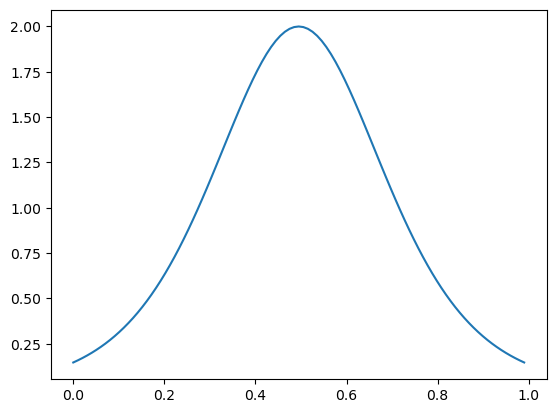

In [158]:
c = 2.
k_1 = jnp.array([1, 0])
k_2 = jnp.array([0, 1])
K = jnp.stack([k_1, k_2]) * c

scores, lines = get_interp(K)
plt.plot(t[:-1], np.abs(np.diff(scores)) / np.diff(t))

In [160]:
np.linalg.norm(K[0] - K[1]) ** 2 / 4

1.9999999315429164

Okay, this makes me think that the maximal slope is going to be:
$\| k_1 - k_2 \| / 2$

In [122]:
np.linalg.norm(k_1 - k_2) / 2

1.0